# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Support Vector Machines

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of Support Vector Machines
* Examine code samples that walk us through **The Process™**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: Support Vector Machines
---

Support Vector Machines (SVM) are popular machine learning models because they:
* can be used in both classification and regression
* can be used for 2-dimensional (2D) data as well as multi-dimensional data (3D, 4D, and more)
    * 2D -> uses a line/curve to separate the classes
    * 3D-plus -> uses a manifold/surface to separate the classes
* can be fairly easy to interpret, especially in 2D

If I give you data points separated into two very distinct classes (or categories), we would probably find it pretty easy to draw a line between the two data points.

<img src='two_classes.png' width='400'>

But how do we know what is the **best line** to draw between the data points **for the purpose of labeling future data points**? The slope of the line could vary widely.

SVM takes the idea of drawing a simple line between two classes of data and adds a parallel margin to either side of the line where the margins go up to the nearest point in each class. By maximizing the margin between the closest points in each class, we can select an optimal separating line. Thus SVMs qualify as `maximum margin` estimators.

From there, classifying new data is simply a matter of identifying which side of the line the point is on. SVM is a form of `discriminative` classification.

For this example, we will use the Support Vector Classifier (SVC). The sklearn.svm module has a number of classifiers and regression models.

* SVC
* SVR
* LinearSVC
* LinearSVR
* NuSVC
* NuSVR

With this background, let's apply **The Process™** on a Support Vector Machine model.

## Prep the data

We start with a set of standard imports...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.svm import SVC

### Prep the training Data

This data set is simply a sequence of `x` and `y` vectors to plot on a chart with a `category` assigned to each vector.

The each group is identified with a category of either `1` or a `0`.

In [2]:
df = pd.read_csv('../universal_datasets/svm_train.csv', 
                 names=['x', 'y', 'category'])
df.head()

,x,y,category
0,-2.177547,-9.470645,0
1,0.586663,-1.576973,1
2,-0.712211,-1.477746,1
3,0.228064,-2.718687,1
4,0.670381,1.384088,1


In [3]:
length = len(df)
X_train = df[['x', 'y']]
y_train = df['category']

It can be really useful to take a look at the `features` matrix and `target` array of the training data. 

* In the raw form
* In a visualization tool

For this dataset, let's use a scatter plot.

In [4]:
X_train[:5]

,x,y
0,-2.177547,-9.470645
1,0.586663,-1.576973
2,-0.712211,-1.477746
3,0.228064,-2.718687
4,0.670381,1.384088


In [5]:
y_train[:5]

0    0
1    1
2    1
3    1
4    1
Name: category, dtype: int64

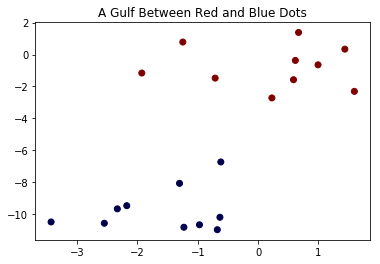

In [6]:
plt.title("A Gulf Between Red and Blue Dots")

plt.scatter(X_train['x'], X_train['y'], c=y_train,
            cmap='seismic');

### Prep the test data

The test data is a similar set of vectors (x, y points) but there are no category labels/classifications.

In the following plot, we chose to set the alpha channel for the dots at 0.15 which makes the dots largely transparent, so that they are visually distinct.

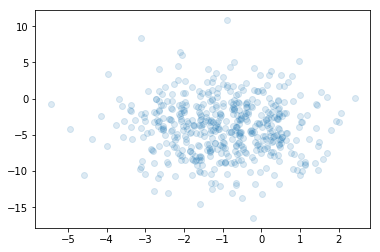

In [7]:
df_test = pd.read_csv('../universal_datasets/svm_test.csv',
                     names=['x', 'y'])

X_test = df_test[['x', 'y']]

plt.scatter(X_test['x'], X_test['y'], alpha=0.15);

## Choose the Model

In this case, we have already decided upon using the Support Vector Classification (SVC) model, so importing it is straightforward. But if we aren't sure what model we want we can always refer back to the [API Reference](https://scikit-learn.org/stable/modules/classes.html).

In [8]:
from sklearn.svm import SVC

## Choose Appropriate Hyperparameters

Here we choose to assign two hyperparameters: `gamma` and `C`.

In [9]:
model = SVC(gamma='scale', C=100)

There are a number of hyperparameters, which potentially makes this model a bit more complicated to use well. Later, we will talk about `gamma`, `kernel` and `C` and leave the rest of the parameters for the student to explore.

```python
SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
```

## Fit the Model

In [10]:
model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Apply the Model

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred.shape

(500,)

In [13]:
y_pred[:5]

array([1, 0, 1, 1, 1])

## Examine the results

In [14]:
# look at the support vectors
model.support_vectors_

array([[-0.6183571 , -6.73082575],
       [ 0.22806354, -2.71868689]])

In [15]:
# look at the indices of the support vectors
model.support_ 

array([12,  3], dtype=int32)

In [16]:
# If we wanted to confirm these indices match up to the 
#     input data... 

X_train.loc[[12, 3]]

,x,y
12,-0.618357,-6.730826
3,0.228064,-2.718687


In [17]:
# look at the number of support vectors for each class
model.n_support_


array([1, 1], dtype=int32)

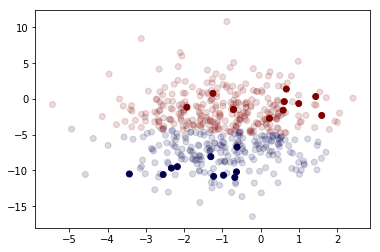

In [18]:
plt.scatter(X_train['x'], X_train['y'], c=y_train,
            cmap='seismic');

plt.scatter(X_test['x'], X_test['y'], c=y_pred,
            cmap='seismic', alpha=0.15);

# Gotchas
---

For training data that is not easy to separate, we can project the data onto another dimension and potentially more easily separate the points.

An example of this is using the `Radial Basis Function (rbf)` (more about `rbf` below) and what is called the **kernel trick**. The kernel trick can automate the projection process to enable SVC to do this projection without having to build a full-blown N-dimensional representation of the data. It basically turns a fast linear method into a fast non-linear method.

Points that are farther from the support vectors do not modify the model. We say that the model is insenstive to the exact behavior of distant points.

NOTE: the Huber model puts weights on outliers to suppress sensitivity to those outliers.

# Deep Dive
---

**kernel**

Kernels are intended to take data as input and transform it into a required output form. One of the most commonly used kernels is based on the `Radial Basis Function (rbf)`, which uses squared Euclidean distance to return a value between zero and one to indicate distance between two points in the vector space around a center point.

$$K(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma\|\mathbf{x} - \mathbf{x'}\|^2)$$

```python
kernel : string, optional (default='rbf')
    Specifies the kernel type to be used in the algorithm.
    It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
    a callable.
    If none is given, 'rbf' will be used. If a callable is given it is
    used to pre-compute the kernel matrix from data matrices; that matrix
    should be an array of shape ``(n_samples, n_samples)``.
```

**gamma**

Gamma is coefficient that impacts the functioning of the kernel. When talking about the `rbf` kernel, gamma represents this. Sigma, according to the documentation on Wikipedia is a free parameter.

$$\gamma = \tfrac{1}{2\sigma^2}$$


```python
gamma : float, optional (default='auto')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    Current default is 'auto' which uses 1 / n_features,
    if ``gamma='scale'`` is passed then it uses 1 / (n_features * X.var())
    as value of gamma. The current default of gamma, 'auto', will change
    to 'scale' in version 0.22. 'auto_deprecated', a deprecated version of
    'auto' is used as a default indicating that no explicit value of gamma
    was passed.
```

**C**

C is used by the model to determine how **hard** the margins should be. If the value of `C` is very small, then the model will allow for some overlap in the margin. If the value of `C` is very high, then the model will find only lines and margins with little OR no overlap with data points. Using a low `C` value should be tuned using model validation techniques.

```python
C : float, optional (default=1.0)
    Penalty parameter C of the error term.
```    

# How to learn more: tips and hints
---

A key component to learning more about machine learning (or any technical topic, really) is exercising curiousity.

As I first started looking at SVM, a couple of questions popped up right away:

* What is a `kernel`?
* What do they do?
* What is `C`?
* How sensitive is SVM to various values of `C`?
* How sensitive is SVM to using different values of `gamma`

I can't say I have great answers to all of these questions, yet.

# Experience Points!
---

# Read the docs: task 01



Take a look at the documentation for the [**k-Means Clustering (link)**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) algorithm:

Try to answer these questions:

* How many times will the k-means algorithm be run with different centroid seeds if using the default setting?
* k-means defaults to how many clusters?

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[General API Reference](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)||
|[SVM API Reference](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)||
|[User Guide](https://scikit-learn.org/stable/modules/svm.html#svm-classification)||

https://en.wikipedia.org/wiki/Radial_basis_function_kernel

https://en.wikipedia.org/wiki/Radial_basis_function
